In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [7]:
fl = pd.read_csv("metabolic.edgelist.txt", delimiter='\t')

In [49]:
g = nx.DiGraph()
for index, row in fl.iterrows():
    g.add_edge(row['0'], row['496'])

In [46]:
G.number_of_nodes() < g.number_of_nodes() and \
G.number_of_nodes() <= g.number_of_nodes()
# = False -> implies G.number_of_nodes() == g.number_of_nodes() 

False

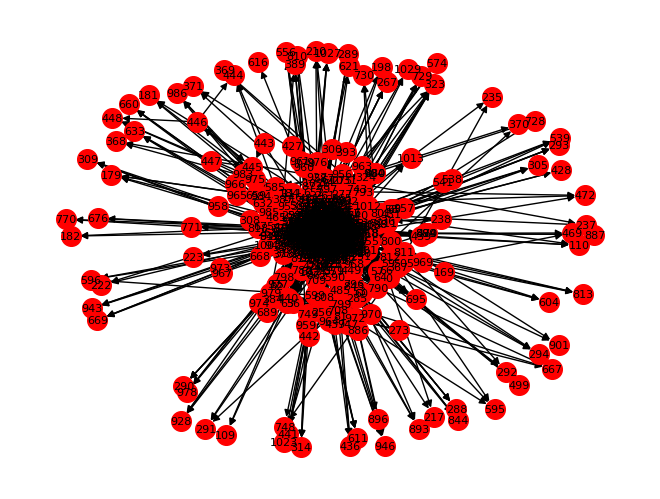

In [60]:
nx.draw(g,
        with_labels=True,
        node_color='red',
        node_size=200,
        font_color='black',
        font_size=8,
        )

In [90]:
avg_degree = lambda gr : np.mean([gr.degree(node) for node in gr.nodes()])
empirical_data = {
    "total_nodes": g.number_of_nodes,
    "total_edges": g.number_of_edges(),
    "<C>": nx.average_clustering(g),
    "<K>": avg_degree(g),
    "<L>": nx.average_shortest_path_length(g)
    }

In [91]:
degrees1 = [g.degree(node) for node in g.nodes()]
degrees2 = np.array([g.in_degree(node) for node in g.nodes()]) + np.array([g.in_degree(node) for node in g.nodes()])
np.mean(degrees1) == np.mean(degrees2)

True

In [92]:
empirical_data

{'total_nodes': <bound method Graph.number_of_nodes of <networkx.classes.digraph.DiGraph object at 0x11eaaa880>>,
 'total_edges': 5801,
 '<C>': 0.28062779594509707,
 '<K>': 11.1665062560154,
 '<L>': 2.57199192939706}

In [147]:
p = empirical_data['<K>'] / g.number_of_nodes()
small_world_p = 
k = 2 * g.number_of_edges() / g.number_of_nodes()

5.5832531280077

In [119]:
g_small_world = nx.watts_strogatz_graph(g.number_of_nodes(), int(k), small_world_p)

In [138]:
def gen_data(G):
    out = {
    "total_nodes": G.number_of_nodes(),
    "total_edges": G.number_of_edges(),
    "<C>": nx.average_clustering(G),
    "<K>": avg_degree(G),
    "<L>": (np.log(G.number_of_nodes()) / np.log(2 * g.number_of_edges() / g.number_of_nodes()))
    }
    return out

In [144]:
small_world_data = gen_data(g_small_world)
small_world_data

{'total_nodes': 1039,
 'total_edges': 5195,
 '<C>': 0.6454334351350673,
 '<K>': 10.0,
 '<L>': 2.878677075453245}

In [146]:
g_barabasi_albert = nx.barabasi_albert_graph(g.number_of_nodes(), int(k / 2))
barabasi_albert_data = gen_data(g_barabasi_albert)
barabasi_albert_data

{'total_nodes': 1039,
 'total_edges': 5170,
 '<C>': 0.04684136876371124,
 '<K>': 9.951876804619827,
 '<L>': 2.878677075453245}

In [148]:
g_erdos_renyi = nx.erdos_renyi_graph(g.number_of_nodes(), p)
erdos_renyi_data = gen_data(g_erdos_renyi)
erdos_renyi_data

{'total_nodes': 1039,
 'total_edges': 5702,
 '<C>': 0.011571329529145401,
 '<K>': 10.975938402309913,
 '<L>': 2.878677075453245}

Text(0, 0.5, 'P(k)')

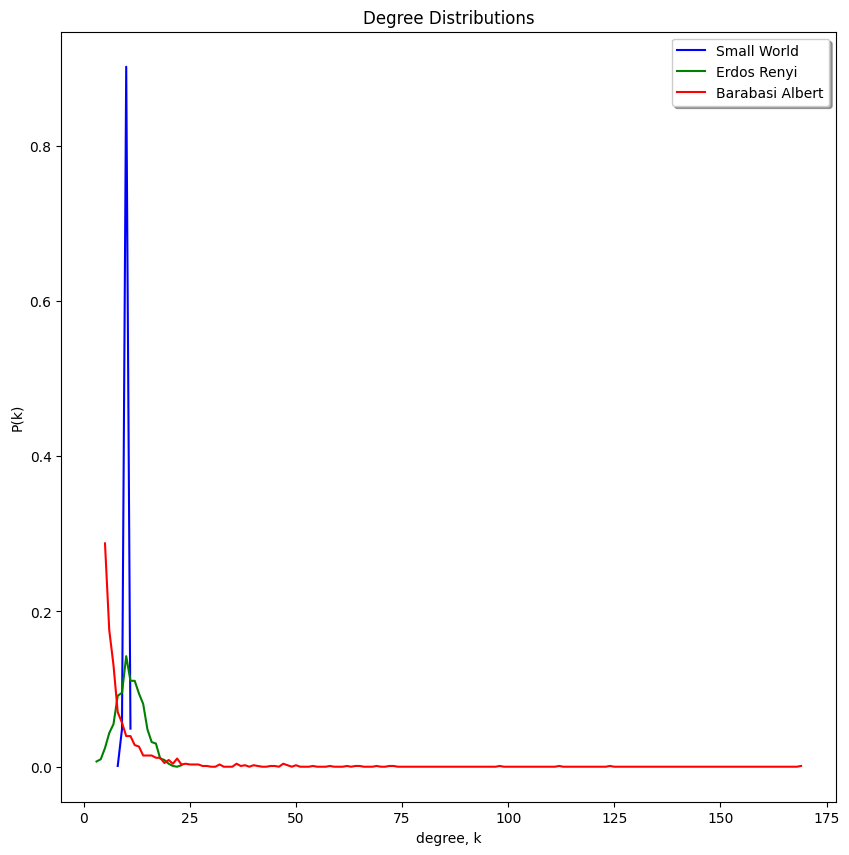

In [150]:
#G1:
degs1 = list(dict(nx.degree(g_small_world)).values())
n1, bins1 = np.histogram(degs1, bins = list(range(min(degs1), max(degs1)+1, 1)), density="True")

#G2:
degs2 = list(dict(nx.degree(g_erdos_renyi)).values())
n2, bins2 = np.histogram(degs2, bins = list(range(min(degs2), max(degs2)+1, 1)), density="True")

#G3:
degs3 = list(dict(nx.degree(g_barabasi_albert)).values())
n3, bins3 = np.histogram(degs3, bins = list(range(min(degs3), max(degs3)+1, 1)), density="True")

#to plot:
plt.figure(figsize=(10,10)) #use once and set figure size

plt.plot(bins1[:-1],n1,'b-', markersize=10, label="Small World") 
plt.plot(bins2[:-1],n2,'g-', markersize=10, label="Erdos Renyi") 
plt.plot(bins3[:-1],n3,'r-', markersize=10, label="Barabasi Albert") 
plt.legend(loc='upper right', shadow=True)
plt.title('Degree Distributions')
plt.xlabel('degree, k')
plt.ylabel('P(k)')

In [152]:
C_p_k = erdos_renyi_data["<K>"] / erdos_renyi_data["total_nodes"]
L_p_k = np.log(erdos_renyi_data["total_nodes"]) / \
    np.log(2 * g_erdos_renyi.number_of_edges() / g_erdos_renyi.number_of_nodes())
print(f"C_p_k: {C_p_k}")
print(f"L_p_k: {L_p_k}")

C_p_k: 0.01056394456430213
L_p_k: 2.899360589257025
